# Classification with Python
    In this notebook we try to classify bank customers into possible loan-defaulters or non-defaulters using a bunch of classifier algorithms.
    We shall use The following algorithms:-
    K-Nearest-Neighbour(KNN) Classifier
    Logistic Regression Classifier
    Support Vector Machine Classifier
    Decision Trees Classifier

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
#@title Default title text
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [4]:
from sklearn.metrics import f1_score, confusion_matrix, log_loss, roc_auc_score, accuracy_score, classification_report

In [5]:
data = 'https://github.com/Blackman9t/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true'

In [6]:
additional_nan_values = ['n/a', '--','?','None','Non','non','none']

In [7]:
loan_df = pd.read_excel(data, header=2, na_values=additional_nan_values)

loan_df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [8]:
loan_df.shape

(5000, 23)

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [10]:
loan_df.describe(include=['object','category']).T

,count,unique,top,freq
Status_Checking_Acc,5000,4,A14,1970
Credit_History,5000,5,A32,2650
Purposre_Credit_Taken,5000,10,A43,1400
Savings_Acc,5000,5,A61,3015
Years_At_Present_Employment,5000,5,A73,1695
Marital_Status_Gender,5000,4,A93,2740
Other_Debtors_Guarantors,5000,3,A101,4535
Property,5000,4,A123,1660
Other_Inst_Plans,5000,3,A143,4070
Housing,5000,3,A152,3565


In [11]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,5000.0,102500.500,1443.520003,100001.0,101250.75,102500.5,103750.25,105000.0
Duration_in_Months,5000.0,20.903,12.053989,4.0,12.00,18.0,24.00,72.0
Credit_Amount,5000.0,3271.258,2821.607329,250.0,1365.50,2319.5,3972.25,18424.0
Inst_Rt_Income,5000.0,2.973,1.118267,1.0,2.00,3.0,4.00,4.0
Current_Address_Yrs,5000.0,2.845,1.103276,1.0,2.00,3.0,4.00,4.0
Age,5000.0,35.546,11.370917,19.0,27.00,33.0,42.00,75.0
Num_CC,5000.0,1.407,0.577423,1.0,1.00,1.0,2.00,4.0
Dependents,5000.0,1.155,0.361941,1.0,1.00,1.0,1.00,2.0
Default_On_Payment,5000.0,0.299,0.457866,0.0,0.00,0.0,1.00,1.0
Count,5000.0,1.000,0.000000,1.0,1.00,1.0,1.00,1.0


In [12]:
loan_df.isna().any().all()  # checking if any missing values and checking if any true value in the response

False

In [13]:
loan_df.dtypes

Customer_ID                     int64
Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
Count                           int64
dtype: object

In [14]:
current_memory = loan_df.memory_usage().sum()
print('Current memory is-', current_memory,'Bytes.')

loan_df.memory_usage()

Current memory is- 920128 Bytes.


Index                            128
Customer_ID                    40000
Status_Checking_Acc            40000
Duration_in_Months             40000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  40000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                 40000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs            40000
Property                       40000
Age                            40000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                         40000
Job                            40000
Dependents                     40000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment             40000
Count                          40000
dtype: int64

In [15]:
# let's change all these columns with a max of 2 digits to int8 to save memory

loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']] = \
loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']].astype('int8')

# Let's change Credit_Amount to 1nt16 and Customer_ID to int32 to save memory

loan_df['Customer_ID'] = loan_df['Customer_ID'].astype('int32')
loan_df['Credit_Amount'] = loan_df['Credit_Amount'].astype('int16')
new_memory = loan_df.memory_usage().sum()
print('New memory is-', new_memory,'Bytes.')

loan_df.memory_usage()

New memory is- 590128 Bytes.


Index                            128
Customer_ID                    20000
Status_Checking_Acc            40000
Duration_in_Months              5000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  10000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                  5000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs             5000
Property                       40000
Age                             5000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                          5000
Job                            40000
Dependents                      5000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment              5000
Count                           5000
dtype: int64

In [16]:
current_memory - new_memory  # We've saved 330,000 Bytes just now.

330000

In [17]:
# Let's see the total columns in the data set

loan_df.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [18]:
loan_df.rename(columns={'Purposre_Credit_Taken':'Credit_Purpose', 
                        'Other_Inst_Plans ':'Other_Inst_Plans',
                        'Years_At_Present_Employment': 'Present_Employment_Years',
                        'Inst_Rt_Income':'Inst_Rate_Income',
                        'Num_CC':'Num_Curr_Credits'}, inplace=True)

In [19]:
customer_data = ['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing','Telephone', 'Property','Current_Address_Yrs']

job_and_personal_finance = ['Job', 'Foreign_Worker', 'Present_Employment_Years', 'Savings_Acc','Status_Checking_Acc', 'Credit_History']

loan_credit_data = ['Credit_Amount', 'Credit_Purpose', 'Duration_in_Months','Inst_Rate_Income','Other_Debtors_Guarantors','Other_Inst_Plans','Num_Curr_Credits','Default_On_Payment','Count']

In [20]:
# lets concatenate the lists

new_columns = customer_data + job_and_personal_finance + loan_credit_data

In [21]:
stripped_columns = [str.strip(x, ' ') for x in new_columns if x[0] or x[-1] == ' '] 
stripped_columns[:5]

['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing']

In [22]:
set(loan_df.columns).difference(set(stripped_columns))

set()

In [23]:
loan_df = loan_df[stripped_columns]

# let's see the first few rows
loan_df.head()

,Customer_ID,Marital_Status_Gender,Age,Dependents,Housing,Telephone,Property,Current_Address_Yrs,Job,Foreign_Worker,...,Credit_History,Credit_Amount,Credit_Purpose,Duration_in_Months,Inst_Rate_Income,Other_Debtors_Guarantors,Other_Inst_Plans,Num_Curr_Credits,Default_On_Payment,Count
0,100001,A93,67,1,A152,A192,A121,4,A173,A201,...,A34,1169,A43,6,4,A101,A143,2,0,1
1,100002,A92,22,1,A152,A191,A121,2,A173,A201,...,A32,5951,A43,48,2,A101,A143,1,0,1
2,100003,A93,49,2,A152,A191,A121,3,A172,A201,...,A34,2096,A46,12,2,A101,A143,1,0,1
3,100004,A93,45,2,A153,A191,A122,4,A173,A201,...,A32,7882,A42,42,2,A103,A143,1,0,1
4,100005,A93,53,2,A153,A191,A124,4,A173,A201,...,A33,4870,A40,24,3,A101,A143,2,1,1


In [24]:
categorical_cols = loan_df.select_dtypes(['object']).columns
print(categorical_cols)

Index(['Marital_Status_Gender', 'Housing', 'Telephone', 'Property', 'Job',
       'Foreign_Worker', 'Present_Employment_Years', 'Savings_Acc',
       'Status_Checking_Acc', 'Credit_History', 'Credit_Purpose',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans'],
      dtype='object')


In [25]:
numerical_columns = loan_df.select_dtypes(['number']).columns
print(numerical_columns)

Index(['Customer_ID', 'Age', 'Dependents', 'Current_Address_Yrs',
       'Credit_Amount', 'Duration_in_Months', 'Inst_Rate_Income',
       'Num_Curr_Credits', 'Default_On_Payment', 'Count'],
      dtype='object')


C:\Users\USER\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaco

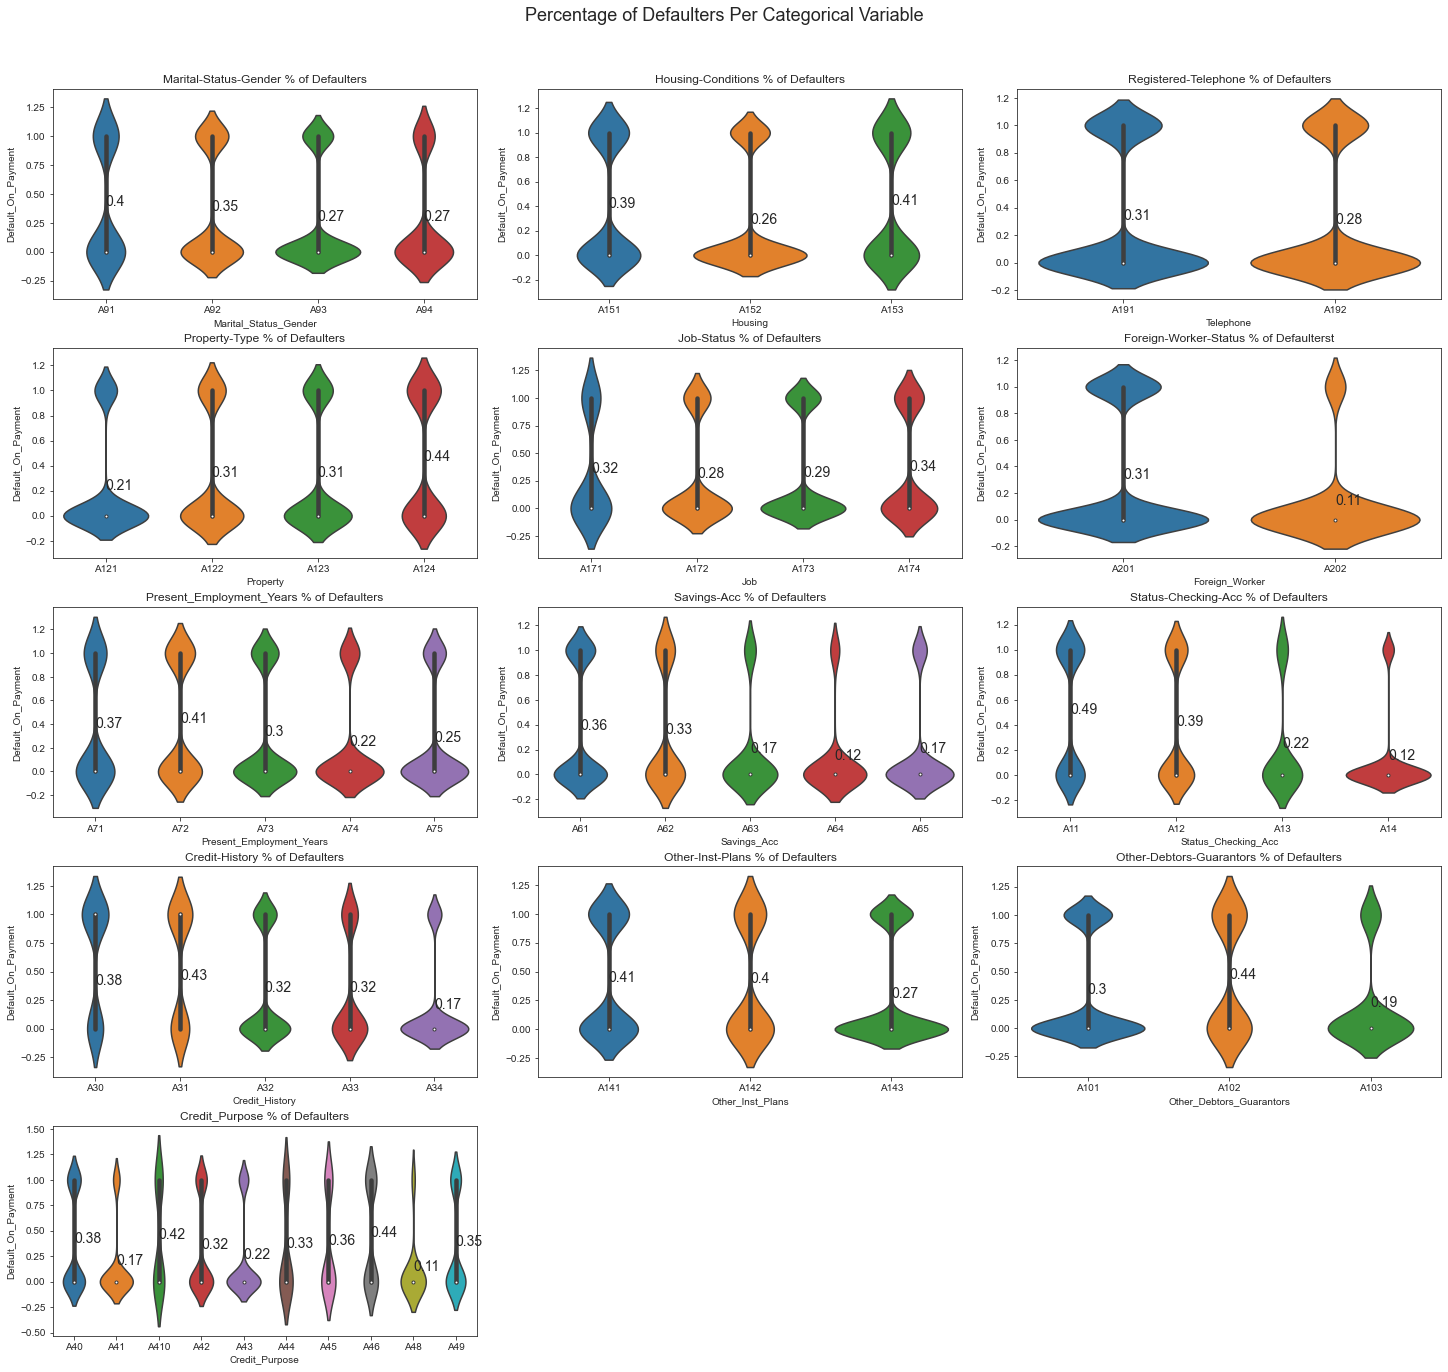

In [26]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(20,18))
sns.set_style('ticks')

specs = gridspec.GridSpec(ncols=3, nrows=5, figure=fig)
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[0, 2])
ax4 = fig.add_subplot(specs[1, 0])
ax5 = fig.add_subplot(specs[1, 1])
ax6 = fig.add_subplot(specs[1, 2])
ax7 = fig.add_subplot(specs[2, 0])
ax8 = fig.add_subplot(specs[2, 1])
ax9 = fig.add_subplot(specs[2, 2])
ax10 = fig.add_subplot(specs[3, 0])
ax11 = fig.add_subplot(specs[3, 1])
ax12 = fig.add_subplot(specs[3, 2])
ax13 = fig.add_subplot(specs[4, 0])
# ax14 = fig.add_subplot(specs[4, 1])
# ax15 = fig.add_subplot(specs[4, 2])

plt.suptitle('Percentage of Defaulters Per Categorical Variable', fontsize=18, y=1.05)


ax1 = sns.violinplot('Marital_Status_Gender', 'Default_On_Payment', data=loan_df, order=['A91','A92','A93','A94'], ax=ax1)
ax1.set_title('Marital-Status-Gender % of Defaulters')
yposlist = loan_df.groupby(['Marital_Status_Gender'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax1.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax2 = sns.violinplot('Housing', 'Default_On_Payment', data=loan_df, order=['A151','A152','A153'], ax=ax2)
ax2.set_title('Housing-Conditions % of Defaulters')
yposlist = loan_df.groupby(['Housing'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax2.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax3 = sns.violinplot('Telephone', 'Default_On_Payment', data=loan_df,order=['A191','A192'], ax=ax3)
ax3.set_title('Registered-Telephone % of Defaulters')
yposlist = loan_df.groupby(['Telephone'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax3.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax4 = sns.violinplot('Property', 'Default_On_Payment', data=loan_df,order=['A121','A122','A123','A124'], ax=ax4)
ax4.set_title('Property-Type % of Defaulters')
yposlist = loan_df.groupby(['Property'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax4.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax5 = sns.violinplot('Job', 'Default_On_Payment', data=loan_df, order=['A171','A172','A173','A174'], ax=ax5)
ax5.set_title('Job-Status % of Defaulters')
yposlist = loan_df.groupby(['Job'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax5.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax6 = sns.violinplot('Foreign_Worker', 'Default_On_Payment', data=loan_df, ax=ax6)
ax6.set_title('Foreign-Worker-Status % of Defaulterst')
yposlist = loan_df.groupby(['Foreign_Worker'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax6.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax7 = sns.violinplot('Present_Employment_Years', 'Default_On_Payment', order=['A71','A72','A73','A74','A75'], data=loan_df, ax=ax7)
ax7.set_title('Present_Employment_Years % of Defaulters')
yposlist = loan_df.groupby(['Present_Employment_Years'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax7.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax8 = sns.violinplot('Savings_Acc', 'Default_On_Payment', data=loan_df, order=['A61','A62','A63','A64','A65'], ax=ax8)
ax8.set_title('Savings-Acc % of Defaulters')
yposlist = loan_df.groupby(['Savings_Acc'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax8.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax9 = sns.violinplot('Status_Checking_Acc', 'Default_On_Payment', data=loan_df,order=['A11','A12','A13','A14'], ax=ax9)
ax9.set_title('Status-Checking-Acc % of Defaulters')
yposlist = loan_df.groupby(['Status_Checking_Acc'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax9.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax10 = sns.violinplot('Credit_History', 'Default_On_Payment', data=loan_df, order=['A30','A31','A32','A33','A34'], ax=ax10)
ax10.set_title('Credit-History % of Defaulters')
yposlist = loan_df.groupby(['Credit_History'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax10.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax11 = sns.violinplot('Other_Inst_Plans', 'Default_On_Payment', data=loan_df,order=['A141','A142','A143'], ax=ax11)
ax11.set_title('Other-Inst-Plans % of Defaulters')
yposlist = loan_df.groupby(['Other_Inst_Plans'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax11.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax12 = sns.violinplot('Other_Debtors_Guarantors', 'Default_On_Payment', data=loan_df, order=['A101','A102','A103'], ax=ax12)
ax12.set_title('Other-Debtors-Guarantors % of Defaulters')
yposlist = loan_df.groupby(['Other_Debtors_Guarantors'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax12.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)

ax13 = sns.violinplot('Credit_Purpose', 'Default_On_Payment', data=loan_df, order=['A40','A41','A410','A42','A43','A44','A45','A46','A48','A49'], ax=ax13)
ax13.set_title('Credit_Purpose % of Defaulters')
yposlist = loan_df.groupby(['Credit_Purpose'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    plt.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)

plt.show()

In [27]:
loan_df.head(3)

,Customer_ID,Marital_Status_Gender,Age,Dependents,Housing,Telephone,Property,Current_Address_Yrs,Job,Foreign_Worker,...,Credit_History,Credit_Amount,Credit_Purpose,Duration_in_Months,Inst_Rate_Income,Other_Debtors_Guarantors,Other_Inst_Plans,Num_Curr_Credits,Default_On_Payment,Count
0,100001,A93,67,1,A152,A192,A121,4,A173,A201,...,A34,1169,A43,6,4,A101,A143,2,0,1
1,100002,A92,22,1,A152,A191,A121,2,A173,A201,...,A32,5951,A43,48,2,A101,A143,1,0,1
2,100003,A93,49,2,A152,A191,A121,3,A172,A201,...,A34,2096,A46,12,2,A101,A143,1,0,1


In [28]:
loan_df_dummies = pd.get_dummies(loan_df)
loan_df_dummies.head(10)

,Customer_ID,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Default_On_Payment,Count,...,Credit_Purpose_A45,Credit_Purpose_A46,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A102,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A141,Other_Inst_Plans_A142,Other_Inst_Plans_A143
0,100001,67,1,4,1169,6,4,2,0,1,...,0,0,0,0,1,0,0,0,0,1
1,100002,22,1,2,5951,48,2,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,100003,49,2,3,2096,12,2,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,100004,45,2,4,7882,42,2,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4,100005,53,2,4,4870,24,3,2,1,1,...,0,0,0,0,1,0,0,0,0,1
5,100006,35,2,4,9055,36,2,1,0,1,...,0,1,0,0,1,0,0,0,0,1
6,100007,53,1,4,2835,24,3,1,0,1,...,0,0,0,0,1,0,0,0,0,1
7,100008,35,1,2,6948,36,2,1,0,1,...,0,0,0,0,1,0,0,0,0,1
8,100009,61,1,4,3059,12,2,1,0,1,...,0,0,0,0,1,0,0,0,0,1
9,100010,28,1,2,5234,30,4,2,1,1,...,0,0,0,0,1,0,0,0,0,1


In [29]:
loan_df_dummies.shape  # we now have 64 total columns from 23 of before

(5000, 64)

In [30]:
categorical_cols = loan_df.select_dtypes(['object']).columns
print(categorical_cols)

Index(['Marital_Status_Gender', 'Housing', 'Telephone', 'Property', 'Job',
       'Foreign_Worker', 'Present_Employment_Years', 'Savings_Acc',
       'Status_Checking_Acc', 'Credit_History', 'Credit_Purpose',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans'],
      dtype='object')


In [31]:
# Let's define a simple method that we can use to sort out the features to delete

def delete_categorical_feature(categorical_cols):
    """ This method takes a list of categorical columns,and returns a list 
    of feature attributes to delete based on set threshold """
    
    delete_list = []
    for x in categorical_cols:
        default_df = loan_df.groupby(x)['Default_On_Payment'].value_counts(normalize=True).to_frame()[1::2]
        delete_feature = default_df[(default_df.Default_On_Payment >= 0.4) & (default_df.Default_On_Payment <= 0.6)]
        delete = [delete_feature.index[i][0] for i in range(len(delete_feature))]
        for i in range(len(delete)):
            delete[i] = x + '_' + delete[i]
        delete_list += delete
    return delete_list

delete_list = delete_categorical_feature(categorical_cols)
print('Total cols to be deleted-', len(delete_list))
delete_list

Total cols to be deleted- 11


['Marital_Status_Gender_A91',
 'Housing_A153',
 'Property_A124',
 'Present_Employment_Years_A72',
 'Status_Checking_Acc_A11',
 'Credit_History_A31',
 'Credit_Purpose_A410',
 'Credit_Purpose_A46',
 'Other_Debtors_Guarantors_A102',
 'Other_Inst_Plans_A141',
 'Other_Inst_Plans_A142']

In [32]:
loan_df_dummies = loan_df_dummies.drop(delete_list, axis=1)

In [33]:
loan_df_dummies.shape

(5000, 53)

In [34]:
loan_df_dummies.head(10)

,Customer_ID,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Default_On_Payment,Count,...,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
0,100001,67,1,4,1169,6,4,2,0,1,...,0,0,1,0,0,0,0,1,0,1
1,100002,22,1,2,5951,48,2,1,0,1,...,0,0,1,0,0,0,0,1,0,1
2,100003,49,2,3,2096,12,2,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,100004,45,2,4,7882,42,2,1,0,1,...,0,1,0,0,0,0,0,0,1,1
4,100005,53,2,4,4870,24,3,2,1,1,...,0,0,0,0,0,0,0,1,0,1
5,100006,35,2,4,9055,36,2,1,0,1,...,0,0,0,0,0,0,0,1,0,1
6,100007,53,1,4,2835,24,3,1,0,1,...,0,1,0,0,0,0,0,1,0,1
7,100008,35,1,2,6948,36,2,1,0,1,...,1,0,0,0,0,0,0,1,0,1
8,100009,61,1,4,3059,12,2,1,0,1,...,0,0,1,0,0,0,0,1,0,1
9,100010,28,1,2,5234,30,4,2,1,1,...,0,0,0,0,0,0,0,1,0,1


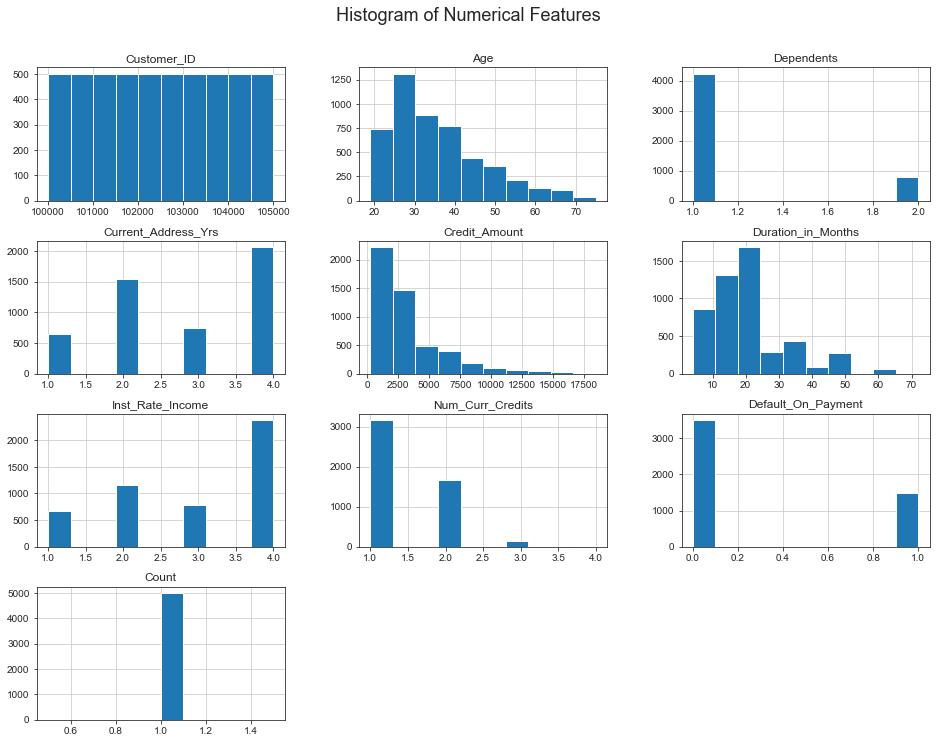

In [35]:
loan_df[numerical_columns].hist(figsize=(16,12))
plt.suptitle('Histogram of Numerical Features', fontsize=18, y=0.95)
plt.show()

In [36]:
loan_df.Age.median() > loan_df.Age.mean() 

False

In [37]:
loan_df.Age.median()

33.0

In [38]:
loan_df.Age.mean() 

35.546

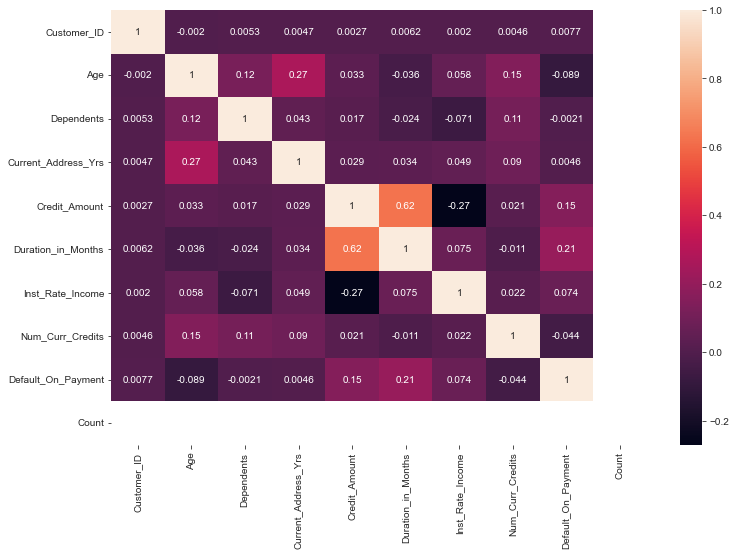

In [39]:
corr_data = loan_df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.show()

In [40]:
loan_df_dummies.Count.nunique()

# this shows it contains only one unique item which is 1,  5000 times.
# I don't see any use for it and will delete it in the dummies data frame so it is not one of our features

1

In [41]:
loan_df_dummies.drop(['Count', 'Customer_ID'], axis=1, inplace=True)

# let's confirm that the delete is done.
'Count' in loan_df_dummies.columns

False

In [42]:
loan_df_dummies.head(10)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Default_On_Payment,Marital_Status_Gender_A92,Marital_Status_Gender_A93,...,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
0,67,1,4,1169,6,4,2,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1,22,1,2,5951,48,2,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,49,2,3,2096,12,2,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,45,2,4,7882,42,2,1,0,0,1,...,0,1,0,0,0,0,0,0,1,1
4,53,2,4,4870,24,3,2,1,0,1,...,0,0,0,0,0,0,0,1,0,1
5,35,2,4,9055,36,2,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,53,1,4,2835,24,3,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
7,35,1,2,6948,36,2,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
8,61,1,4,3059,12,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9,28,1,2,5234,30,4,2,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [43]:
temp = loan_df_dummies.Default_On_Payment

loan_df_dummies = loan_df_dummies.drop('Default_On_Payment', axis=1)

loan_df_dummies['Default_On_Payment'] = temp

loan_df_dummies.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,...,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,45,2,4,7882,42,2,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,53,2,4,4870,24,3,2,0,1,0,...,0,0,0,0,0,0,1,0,1,1


In [44]:
loan_df.Default_On_Payment.value_counts(normalize=True)

0    0.701
1    0.299
Name: Default_On_Payment, dtype: float64

C:\Users\USER\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


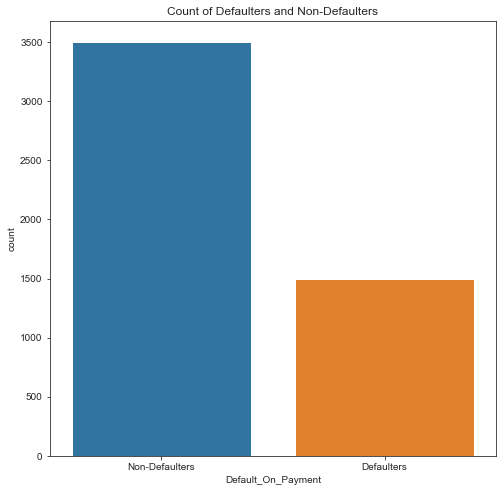

In [45]:
plt.figure(figsize=(8, 8))

x = loan_df_dummies.Default_On_Payment.replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(x)
plt.title('Count of Defaulters and Non-Defaulters')
plt.show()

In [48]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [49]:
sm = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)

In [50]:
over_sampled_features, over_sampled_target = sm.fit_resample(loan_df_dummies.drop('Default_On_Payment', axis=1), loan_df_dummies.Default_On_Payment)

In [51]:
print('Shape of resampled feature set is:',over_sampled_features.shape)
print('Shape of resampled target data is:',over_sampled_target.shape)

Shape of resampled feature set is: (7010, 50)
Shape of resampled target data is: (7010,)


C:\Users\USER\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


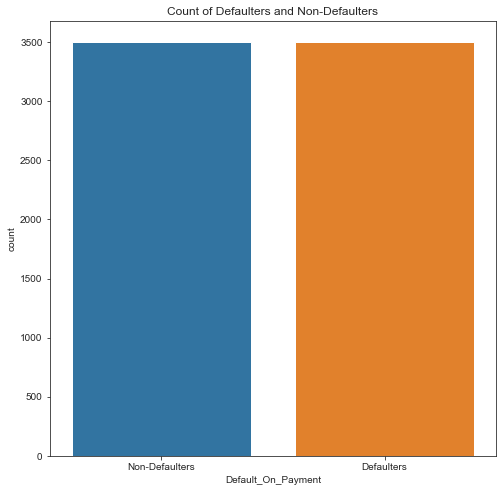

In [52]:
plt.figure(figsize=(8, 8))

yy = pd.Series(over_sampled_target).replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(yy)
plt.title('Count of Defaulters and Non-Defaulters')
plt.show()

In [53]:
# The SMOTE process returns a numpy array, from the features and target dataframe it received.
type(over_sampled_features)

pandas.core.frame.DataFrame

In [54]:
over_sampled_features = pd.DataFrame(over_sampled_features)

over_sampled_features['x'] = over_sampled_target

resampled_data = over_sampled_features

resampled_data.head(2)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,...,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,x
0,67,1,4,1169,6,4,2,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [55]:
resampled_data.columns = loan_df_dummies.columns

resampled_data.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,...,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,45,2,4,7882,42,2,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,53,2,4,4870,24,3,2,0,1,0,...,0,0,0,0,0,0,1,0,1,1


C:\Users\USER\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


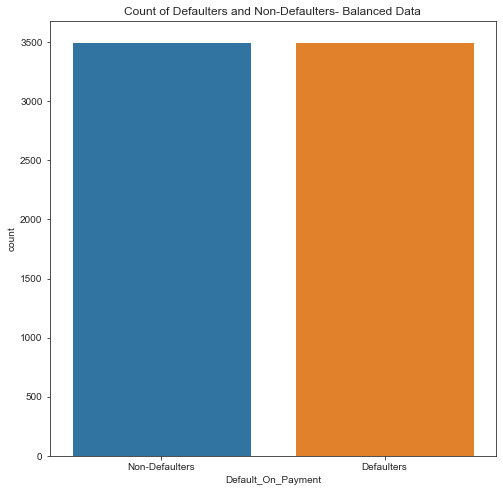

In [56]:
plt.figure(figsize=(8, 8))

x = resampled_data.Default_On_Payment.replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(x)
plt.title('Count of Defaulters and Non-Defaulters- Balanced Data')
plt.show()

# Feature Normalization
Let's use the min-max Normalizer by simply subtracting the min from each entry and divide by the range. This will return a number between 0 and 1 for all features

In [57]:
resampled_data.head(3)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,...,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [59]:
resampled_data.iloc[:,:-1] = resampled_data.iloc[:,:-1].apply(lambda x: (x - min(x)) / (max(x) - min(x)))

In [60]:
resampled_data.head(5)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,...,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,0.857143,0.0,1.000000,0.050567,0.029412,1.000000,0.333333,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.053571,0.0,0.333333,0.313690,0.647059,0.333333,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.535714,1.0,0.666667,0.101574,0.117647,0.333333,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,0.464286,1.0,1.000000,0.419941,0.558824,0.333333,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,0.607143,1.0,1.000000,0.254209,0.294118,0.666667,0.333333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


## Splitting The Data set into Training, Validation and Testing sets
We shall use 70% for training, 15% for validation and 15% reserved only for final testing

In [61]:
from sklearn.model_selection import train_test_split
X = resampled_data.iloc[:,:-1]
Y = resampled_data.Default_On_Payment

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y)

In [62]:
# let's further split y_train, y_test into test and validation sets
X = x_test
Y = y_test

x_val, x_test, y_val, y_test = train_test_split(X, Y, test_size = 0.5, stratify=Y)

In [63]:
print('x_train shape is:', x_train.shape)
print('y_train shape is:', y_train.shape)
print('x_val shape is:', x_val.shape)
print('y_val shape is:', y_val.shape)
print('x_test shape is:', x_test.shape)
print('y_test shape is:', y_test.shape)

x_train shape is: (4907, 50)
y_train shape is: (4907,)
x_val shape is: (1051, 50)
y_val shape is: (1051,)
x_test shape is: (1052, 50)
y_test shape is: (1052,)


## Define a function for plotting and visualizing The Confusion matrix

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# K-Nearest-Neighbour Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
def knn_classifier(x_train, y_train, x_val, y_val):
    """This method takes the training and testing data sets and creates a 
    knn classifier, then it tunes the hyper-parameters of the classifier to
    find the best model parameters and returns the best knn classifier model
    """
    #List Hyperparameters that we want to tune.
    leaf_size = list(range(1,6))
    n_neighbors = list(range(1,6))
    p=[1,2]
    #Convert to dictionary
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

    # create a new KNN object
    knn = KNeighborsClassifier()

    #Use GridSearch
    knn_grid = GridSearchCV(knn, hyperparameters, cv=3)
    
    #Fit the model 
    best_model = knn_grid.fit(x_train, y_train)

    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

    evaluation_dict ={'AUC':0, 'F1_Score':0, 'Log_loss':0}

    y_hat = best_model.predict(x_val)
    evaluation_dict['AUC'] = roc_auc_score(y_val, y_hat)

    # Let's Measure the F1 Score
    evaluation_dict['F1_Score'] = round(f1_score(y_val, y_hat, average='weighted'),4)
        
    # Let's Measure Logloss
    evaluation_dict['Log_loss'] = round(log_loss(y_val, y_hat, normalize=True),4)

    print(evaluation_dict)
    
    # Compute confusion matrix
    knn_cnf_matrix = confusion_matrix(y_val, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(knn_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for KNN-Classifier')


    return best_model


Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
{'AUC': 1.0, 'F1_Score': 1.0, 'Log_loss': 0.0}
Confusion matrix, without normalization
[[525   0]
 [  0 526]]


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2]})

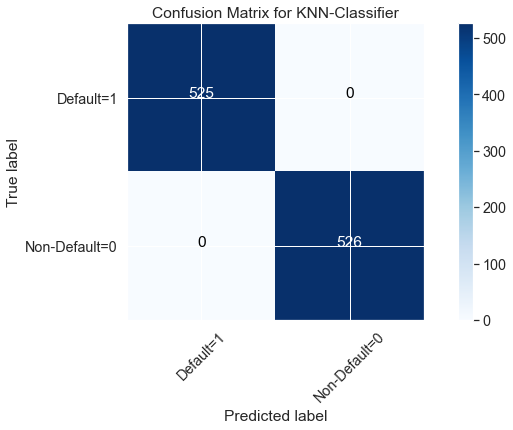

In [67]:
KNN_Model = knn_classifier(x_train, y_train, x_val, y_val)
KNN_Model

In [ ]:
# Logistic Regression Classifier

In [68]:
# Let's import the Logistic Regression Classifier and a few additional libraries.

from sklearn.linear_model import LogisticRegression
import pylab as pl
import scipy.optimize as opt

In [69]:
def log_reg_classifier(x_train, y_train, x_val, y_val):
    """This method takes the training and validation datasets and returns
    The best possible Logistic Regression Model"""

    evaluation_dict ={'AUC':0, 'F1_Score':0, 'Log_loss':0}

    # Let's define some hyper parameters to tune our Log_Reg Model.
    dual=[True,False]
    max_iter=[160, 170, 180,190,200]
    #C = [1.0,1.5,2.0,2.5]
    C = [0.001, 0.01, 0.1, 1, 10]
    param_grid = dict(dual=dual,max_iter=max_iter,C=C)

    # Initiate the LR model with random hyperparameters
    lr = LogisticRegression(penalty='l2')
    grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

    grid_result = grid.fit(x_train, y_train)
    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    y_hat = grid_result.predict(x_val)
    evaluation_dict['AUC'] = roc_auc_score(y_val, y_hat)

    # Let's Measure the F1 Score
    evaluation_dict['F1_Score'] = round(f1_score(y_val, y_hat, average='weighted'),4)
        
    # Let's Measure Logloss
    evaluation_dict['Log_loss'] = round(log_loss(y_val, y_hat, normalize=True),4)

    print(evaluation_dict)
    
    # Compute confusion matrix
    logReg_cnf_matrix = confusion_matrix(y_val, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(logReg_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for LogReg-Classifier')

    
    return grid_result

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model

Best: 0.764213 using {'C': 1, 'dual': False, 'max_iter': 160}
{'AUC': 0.7821111714647837, 'F1_Score': 0.7821, 'Log_loss': 7.5257}
Confusion matrix, without normalization
[[410 115]
 [114 412]]


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'dual': [True, False],
                         'max_iter': [160, 170, 180, 190, 200]})

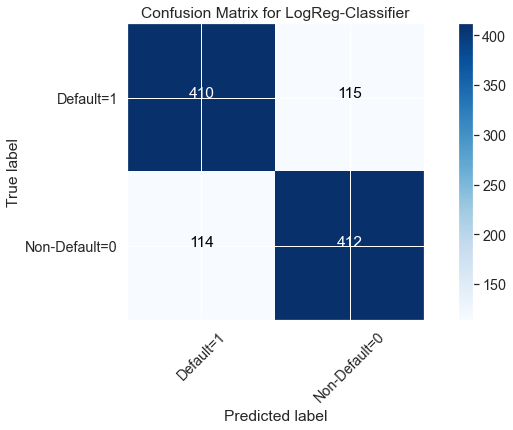

In [70]:
Log_Reg_Model = log_reg_classifier(x_train, y_train, x_val, y_val)
Log_Reg_Model

# Support Vector Machine (SVM)

In [71]:
from sklearn import svm

In [72]:
def svm_classifier(x_train, y_train, x_val, y_val):
    """This method takes the training and validation datasets as inputs,
    and iterates through the common SVM model kernels to return the best model
    we also apply some hyper-parameter tuning on the model"""

    # Let's define a list of kernels to try
    kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

    # Let's define a dict for evaluating each kernel performance
    evaluation_dict ={'Kernel':0, 'AUC':0, 'F1_Score':0, 'Log_Loss':0}

    for i in kernel_list:
        # Let's define the model hyper-parameter tuning grid using GridSearch 
        Cs = [0.001, 0.01, 0.1, 1, 10]
        gammas = [0.001, 0.01, 0.1, 1]
        param_grid = {'C': Cs, 'gamma' : gammas}
        model = GridSearchCV(svm.SVC(kernel=i), param_grid, cv=3)
        # Let's train the model
        model.fit(x_train, y_train)
        # Let's get the best params of the model
        params = model.best_params_

        # Let's use the model to predict the x_val
        y_hat = model.predict(x_val)

        # Let's Measure the F1 Score
        val_f1 = round(f1_score(y_val, y_hat, average='weighted'),4)
        
        # Let's Measure Logloss
        logloss = round(log_loss(y_val, y_hat, normalize=True),4)

        # Let's compute the AUC score
        AUC = roc_auc_score(y_val, y_hat)
        
        if evaluation_dict['AUC'] < AUC:
            print(i)
            evaluation_dict['Kernel'] = i
            evaluation_dict['AUC'] = AUC
            evaluation_dict['F1_Score'] = val_f1
            evaluation_dict['Log_Loss'] = logloss
            svm_model2 = model
            y_hat2 = y_hat

        # If we score a perfect model, then break out of loop!
        if evaluation_dict['AUC'] == 1:
            break

    print(evaluation_dict)
    print('best_params: ',params)

    # Compute confusion matrix
    svm_cnf_matrix = confusion_matrix(y_val, y_hat2, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(svm_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for SVM-Classifier')

    return svm_model2

linear
poly
{'Kernel': 'poly', 'AUC': 0.9990476190476191, 'F1_Score': 0.999, 'Log_Loss': 0.0329}
best_params:  {'C': 10, 'gamma': 0.01}
Confusion matrix, without normalization
[[524   1]
 [  0 526]]


GridSearchCV(cv=3, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

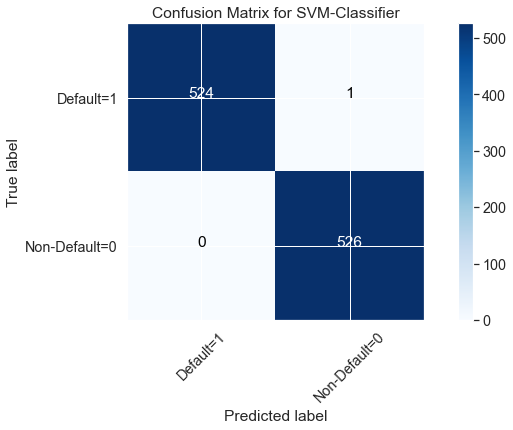

In [73]:
SVM_Model = svm_classifier(x_train, y_train, x_val, y_val)
SVM_Model

# Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters
max_depth = 100

def decision_tree_classifier(max_depth, x_train, y_train, x_val, y_val):
    """Method takes max_depth an int, and x_train and y_train 2D/1D arrays,
    as well as test data x_test and y_test, also arrays, and returns,
    The best max_depth value, from 1 to max_depth, and its best test_accuracy score"""
    
    evaluation_dict ={'Max_Depth':0, 'AUC':0, 'F1_Score':0, 'Log_Loss':0}

    
    for i in range(1, max_depth+1):
        # Let's instantiate a model
        decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)
        
        # Let's train the model
        decision_model.fit(x_train, y_train)
        
        # Let's make prediction on the test data
        y_hat = decision_model.predict(x_val)
        
        # Let's Measure the F1 Score
        val_f1 = round(f1_score(y_val, y_hat, average='weighted'),4)
        
        # Let's Measure Logloss
        logloss = round(log_loss(y_val, y_hat, normalize=True),4)

        # Let's compute the AUC score
        AUC = roc_auc_score(y_val, y_hat)
        # print(AUC,':',i)
        
        if evaluation_dict['AUC'] < AUC:
            evaluation_dict['Max_Depth'] = i
            evaluation_dict['AUC'] = AUC
            evaluation_dict['F1_Score'] = val_f1
            evaluation_dict['Log_Loss'] = logloss
            decision_model2 = decision_model

        # If we score a perfect model, then break out of loop!
        if evaluation_dict['AUC'] == 1:
            break
            
    print('Model_Evaluation:')
    print(evaluation_dict)
    
    # Compute confusion matrix
    Dtrees_cnf_matrix = confusion_matrix(y_val, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for Decision-Tree-Classifier')

    return decision_model2

Model_Evaluation:
{'Max_Depth': 29, 'AUC': 0.9971428571428571, 'F1_Score': 0.9971, 'Log_Loss': 0.0986}
Confusion matrix, without normalization
[[521   4]
 [  0 526]]


DecisionTreeClassifier(criterion='entropy', max_depth=29)

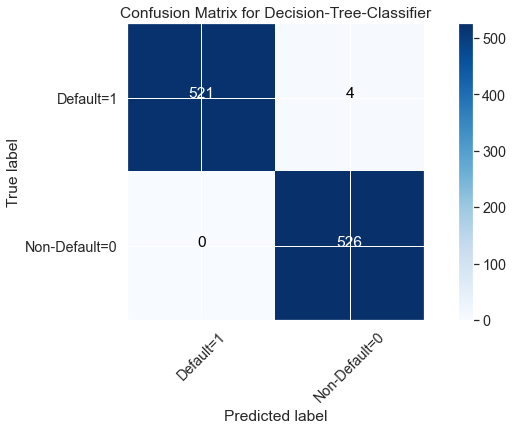

In [76]:
Decision_Tree_Model = decision_tree_classifier(max_depth, x_train, y_train, x_val, y_val)
Decision_Tree_Model

The area under the ROC curve or AUC is the measure of the trade-off between the True and False positive rates.


## Test Dataset:
Now that we've seen the performance of each model on the evaluation data set,
It's time to test these on the test data set

In [77]:
def best_model(x_test , y_test):
    """This method takes the test training and test label sets and returns 
    a dataframe sorted with the model with the highest AUC score"""

    # Let's create a list of our models
    model_list = [KNN_Model, Log_Reg_Model, SVM_Model, Decision_Tree_Model]

    # Let's create a test evaluation dict and make the parameters its index
    test_evaluation_dict = {'KNN_Model':[0,0,0], 'Log_Reg_Model':[0,0,0], \
                            'SVM_Model':[0,0,0], 'Decision_Tree_Model':[0,0,0]}
    index_ = ['AUC_score', 'F1_score', 'Accuracy']  

    # Let's create a list of the keys of our dict above
    key_list = list(test_evaluation_dict.keys())

    for i in range(len(model_list)):
        model = model_list[i]
        key = key_list[i]

        # Let's create a list of test values
        eval_list = []

        # Let's make prediction on the test data
        y_hat = model.predict(x_test)

        # Let's add the AUC score
        eval_list.append(round(roc_auc_score(y_test, y_hat),4))
        
        # Let's add the F1 Score
        eval_list.append(round(f1_score(y_test, y_hat, average='weighted'),4))
        
        # Let's add accuracy
        eval_list.append(round(accuracy_score(y_test, y_hat),4))

        test_evaluation_dict[key] = eval_list       

    test_evaluation_df = pd.DataFrame(test_evaluation_dict, index=index_).T

    test_evaluation_df = test_evaluation_df\
    .sort_values(by=['AUC_score', 'F1_score'], ascending=False)

    test_evaluation_df.reset_index(inplace=True)
    test_evaluation_df.index = [1, 2, 3, 4]
    test_evaluation_df.columns = ['Model', 'AUC_score', 'F1_score', 'Accuracy']

    

    return test_evaluation_df

In [78]:
test_evaluation_dict = best_model(x_test , y_test)
test_evaluation_dict

,Model,AUC_score,F1_score,Accuracy
1,KNN_Model,1.0000,1.0000,1.0000
2,SVM_Model,1.0000,1.0000,1.0000
3,Decision_Tree_Model,0.9943,0.9943,0.9943
4,Log_Reg_Model,0.7909,0.7907,0.7909


 ### What Next?
    We can see the best model on the never-before-seen testing set is Support Vector Machine (SVM).
    This is personally my preferred classifier model as SVMs are a solid classifier which usually perform excellently.
    SVMs are resistant to outliers, this means we get a clear boundary between the point data clouds, even if there are outliers in the data set.
    The optimisation objective of a Support Vector machine is Convex. That's a really cool feature because we're guaranteed that by optimising over the cost function of an SVM, we will always end up in the global minima.
    The only problem is that an SVM is a binary classifier.
    But, we can turn the SVM into a Multi-Class classifier Using the One-Versus-All approach.

    It's important to also note the impressive performance of the KNN and Decision Tree classifier. These are also relatively good models. The issue with KNN is that it is not outlier resistant and it can only create spherical data point clouds on the data. This limitation makes it less powerful to SVMs generally.

### Disadvantages of KNN

    1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

    2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

    3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

    4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

    While Decision Trees are relatively considered weak models, but in certain situations like this case, it has performed remarkably.

    A small change in the data can cause a large change in the structure of the decision tree causing instability. For a Decision tree sometimes calculation can go far more complex compared to other algorithms. Decision tree often involves higher time to train the model. Decision tree training is relatively expensive as complexity and time taken is more.

    Logistic regression is ideal if the data points have a relatively linear relationship with the target label. They do not usually generalise well if the data set is curvy or scattered.

## Before Deployment:
Finally before deploying the model, we need to train it with the entire data set, this iincludes the training, validation and testing data sets.

In [79]:
# Let's see the shape of the normalised and feature-engineered data set again
resampled_data.shape

(7010, 51)

In [80]:
# Let's see the first 5 rows
resampled_data.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,...,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,0.857143,0.0,1.000000,0.050567,0.029412,1.000000,0.333333,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.053571,0.0,0.333333,0.313690,0.647059,0.333333,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.535714,1.0,0.666667,0.101574,0.117647,0.333333,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,0.464286,1.0,1.000000,0.419941,0.558824,0.333333,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,0.607143,1.0,1.000000,0.254209,0.294118,0.666667,0.333333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [81]:
# Let's define the feature set made up of all data points in the data set.
features = resampled_data.iloc[:,0:-1]
features.head(3)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,...,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
0,0.857143,0.0,1.000000,0.050567,0.029412,1.000000,0.333333,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.053571,0.0,0.333333,0.313690,0.647059,0.333333,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.535714,1.0,0.666667,0.101574,0.117647,0.333333,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [82]:
# Now let's define the target or label
target = resampled_data.Default_On_Payment
target.head(3)

0    0
1    0
2    0
Name: Default_On_Payment, dtype: int8

In [83]:
SVM_Model = SVM_Model.fit(features, target)
SVM_Model

GridSearchCV(cv=3, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

# Conclusion
    We've just built a classifier model that can classify never-unseen data of bank customers into possible loan-defaulters or non-loan-defaulters.
    We have chosen the SVM classifier due to its numerous strengths mentioned above and it's impressive score of over 99% in AUC, F1 and Accuracy metrics. We have trained it with the entire 7010 data points and 51 dimensions.
    Our model is ready to be deployed.
    Cheers!!

    As a closing exercise, let's apply Permutation Importance to see what top features influence our Models decision

In [84]:
try:
    import eli5
except:
    ! pip install eli5
    import eli5
print('Eli5 imported')

Eli5 imported


In [85]:
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction

In [86]:
# First let'create a list of two top models
top_models = [KNN_Model, SVM_Model]
count = 0
perm_knn = 0
perm_svm = 0
for model in top_models:
    # Next, let's instantiate the PemuatationImportance object
    if count > 0:
        perm_svm = PermutationImportance(model, random_state=1).fit(features, target)
        class_names_ = list(features.columns)
        break
    else:
        perm_knn = PermutationImportance(model, random_state=1).fit(features, target)
        class_names_ = list(features.columns)
        count += 1

In [87]:
# Let's show the weights of features in the data set for KNN
print('Permutaion Importance for KNN_model: ')
print()
eli5.show_weights(perm_knn, feature_names = class_names_)

Permutaion Importance for KNN_model: 



Weight,Feature
0.0040 ± 0.0005,Other_Inst_Plans_A143
0.0021 ± 0.0005,Present_Employment_Years_A75
0.0018 ± 0.0009,Current_Address_Yrs
0.0015 ± 0.0006,Marital_Status_Gender_A93
0.0011 ± 0.0004,Present_Employment_Years_A73
0.0011 ± 0.0006,Status_Checking_Acc_A12
0.0007 ± 0.0006,Duration_in_Months
0.0005 ± 0.0001,Status_Checking_Acc_A14
0.0003 ± 0.0001,Age
0.0003 ± 0.0003,Credit_History_A32


In [88]:
# Let's show the weights of features in the data set for SVM
print('Permutaion Importance for SVM_model: ')
print()
eli5.show_weights(perm_svm, feature_names = class_names_)

Permutaion Importance for SVM_model: 



Weight,Feature
0.1439 ± 0.0051,Status_Checking_Acc_A14
0.0691 ± 0.0037,Credit_History_A34
0.0528 ± 0.0029,Marital_Status_Gender_A93
0.0446 ± 0.0022,Status_Checking_Acc_A12
0.0415 ± 0.0019,Other_Inst_Plans_A143
0.0393 ± 0.0037,Credit_History_A32
0.0389 ± 0.0027,Present_Employment_Years_A74
0.0373 ± 0.0024,Inst_Rate_Income
0.0369 ± 0.0011,Marital_Status_Gender_A92
0.0355 ± 0.0042,Credit_Purpose_A43
